In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
# Moore-Penrose Pseudoinverse
# In some cases, a system of equation has no solution, and thus the inverse doesn’t exist. 
# However it can be useful to find a value that is almost a solution (in term of minimizing the error).

# Matrices can be used to solve systems of equations
# The matrix form

# I.e. inverse of matrix A cna be used to solve equation Ax = b
# A-1Ax = A-1b
# Ix = A-1b
# x = A-1b

# in the case where the set of equations have 0 or many solutions the inverse cannot be found and the equation cannot be solved.
# Pseudoinverse = A+ where. AA+ ~ In
# or. ||AA+ - In||2

# Finding the pseudoinverse:

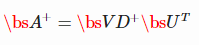

In [3]:
# U, D, V come from SVD decomposition
# D+ is the pseudoinverse of D
# D is a diagonal matrix - as such, pseudoinverse can be found by taking reciprocal of non-0 values of D

In [20]:
# Matrix:
A = np.array([
    [7, 2],
    [3, 4],
    [5, 3]
])

U, D, V = np.linalg.svd(A)

# start D+ as zeros:
D_p = np.zeros((
    A.shape[0],
    A.shape[1]
)).T

# insert diagonal of D into the empty matrix
D_p[:D.shape[0], :D.shape[0]] = np.linalg.inv(np.diag(D))

Pseudoinverse = V.T.dot(D_p).dot(U.T)
Pseudoinverse_np = np.linalg.pinv(A)

# almost there...
# A-1A = In = in other words. inverse of A dot-product-ed with A should give identity matrix
I = Pseudoinverse.dot(A)
# this won't work! I2 = A.dot(Pseudoinverse)


array([[ 0.83333333, -0.16666667,  0.33333333],
       [-0.16666667,  0.83333333,  0.33333333],
       [ 0.33333333,  0.33333333,  0.33333333]])

In [21]:
# Pseudoinverse can be used to solve overdetermined systems of linear equations
# in general, there are no solutions to such systems. I.e. no intersections of all lines/planes

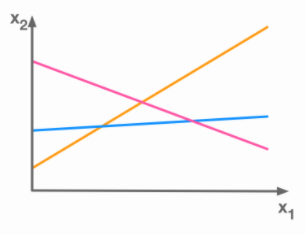

In [22]:
# The pseudoinverse solves the system in the least square error perspective: 
# # # it finds the solution that minimizes the error.

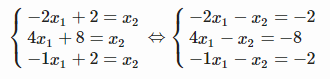

In [23]:
# 3 equations, 2 unknowns = overdetermined system

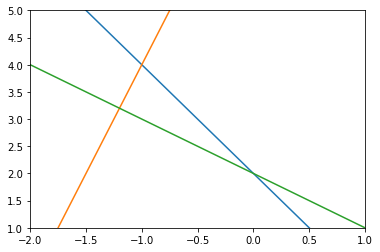

In [24]:
x1 = np.linspace(-5, 5, 1000)
x2_1 = -2*x1 + 2
x2_2 = 4*x1 + 8
x2_3 = -1*x1 + 2

plt.plot(x1, x2_1)
plt.plot(x1, x2_2)
plt.plot(x1, x2_3)
plt.xlim(-2., 1)
plt.ylim(1, 5)
plt.show()

In [25]:
# Same equations in matrix form:

A = np.array([
    [-2, -1],
    [4, -1],
    [-1, -1]
])

b = np.array([-2, -8, -2])

# we are looking for combination of x1, x2 that under least squared error, gives solution to the 3 equations
# i.e. approximates the function

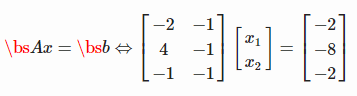

In [27]:
# So lets calc pseudoinverse of A

A_p = np.linalg.pinv(A)
A_p

array([[-0.11290323,  0.17741935, -0.06451613],
       [-0.37096774, -0.27419355, -0.35483871]])

In [31]:
# now we can use it to find x as we know that:
# # x = A+b
# # and x is a vector of x1, x2

x1x2_vec = A_p.dot(b)

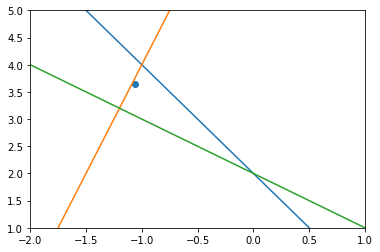

In [32]:
plt.plot(x1, x2_1)
plt.plot(x1, x2_2)
plt.plot(x1, x2_3)
plt.xlim(-2., 1)
plt.ylim(1, 5)

plt.scatter(x1x2_vec[0], x1x2_vec[1])

plt.show()

In [33]:
# The point may not be in the center but is at the intersection of 3 symmedians of the triangle

In [34]:
# Using the pseuodinverse to fit a line through a set of points.

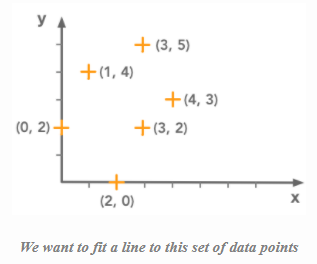

In [35]:
# we have:
# set of y and x coordinates
# looking for: y = mx + b, that minimizes the error
# Error evaluation - sum of differences between fit and actual datapoints

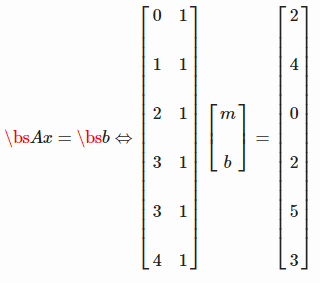

In [36]:
# A = values of coefficients
# column of 1s corresponds to intercepts

# we have the following equations

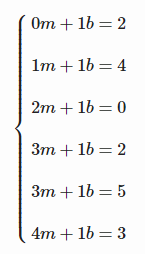

In [37]:
# problem is a bit different
# we are not looking for x or y
# we are looking for coefficients

In [38]:
A = np.array([
    [0, 1], 
    [1, 1], 
    [2, 1], 
    [3, 1], 
    [3, 1], 
    [4, 1]
])

In [39]:
b = np.array([
    [2], 
    [4], 
    [0], 
    [2], 
    [5], 
    [3]
])

In [40]:
# calculate pseudoinverse of A
A_p = np.linalg.pinv(A)

In [41]:
# apply to result to find coefficients
# x = A+b

coefs = A_p.dot(b)
# here coefs[0] --> slope (m)
# here coefs[1] --> intercept (b)
# can now plot y = mx + b

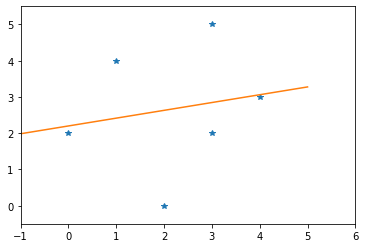

In [42]:
x = np.linspace(-1, 5, 1000)
y = coefs[0]*x + coefs[1]

plt.plot(A[:, 0], b, '*')
plt.plot(x, y)
plt.xlim(-1., 6)
plt.ylim(-0.5, 5.5)

plt.show()

In [57]:
# More realistic example:

# seeds reproducible random number generator
np.random.seed(123)

# generates 100 random numbers between 0 - 1 and multiplies them by 5 to give 100 random numbers between 0 and 5
x = 5 * np.random.rand(100)
y = 2 * x + 1 + np.random.randn(100)

# reshape into matrices with 1 column
x = x.reshape(100, 1)
y = y.reshape(100, 1)

# generate the matrix by concatenating x with column of 1s like above for intercepts
A = np.hstack((x, np.ones(np.shape(x))))

# find pseudoinverse
A_p = np.linalg.pinv(A)
coefs = A_p.dot(y)
coefs

array([[1.9461907 ],
       [1.16994745]])

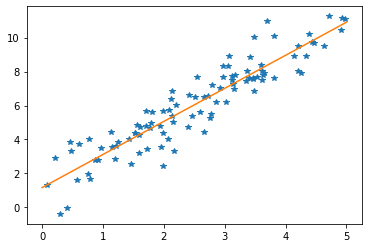

In [58]:
x_line = np.linspace(0, 5, 1000)
y_line = coefs[0] * x_line + coefs[1]

plt.plot(x, y, '*')
plt.plot(x_line, y_line)
plt.show()